INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:compiling stan file C:\Users\awitc\Desktop\DataAnalytics\Lab2\code_3.stan to exe file C:\Users\awitc\Desktop\DataAnalytics\Lab2\code_3.exe


INFO:cmdstanpy:compiled model executable: C:\Users\awitc\Desktop\DataAnalytics\Lab2\code_3.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/awitc/Desktop/DataAnalytics/Lab2/code_3.hpp C:/Users/awitc/Desktop/DataAnalytics/Lab2/code_3.stan
Warning in 'C:/Users/awitc/Desktop/DataAnalytics/Lab2/code_3.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan


INFO:cmdstanpy:CmdStan done processing.


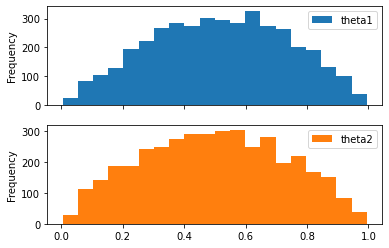

In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# first model
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

# second model
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=20)
plt.show()